In [13]:
# A/B video game testing for player retention
# Testing if a time/pay wall should be at level 30 or 40
import pandas as pd
%matplotlib inline

# Reading in data
df = pd.read_csv('datasets/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Text(0,0.5,'# of Players')

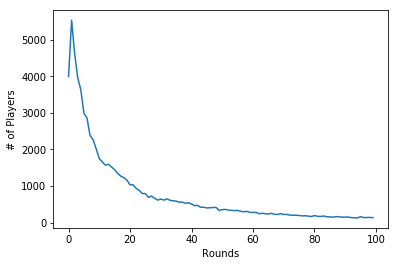

In [14]:
# Counting the number of players in each AB group.
df.groupby('version').count()

# Counting players per round
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Seeing who played to 100 rounds
ax = plot_df.iloc[:100].plot()
ax.set_xlabel("Rounds")
ax.set_ylabel("# of Players")

In [15]:
# % of day 1 retention
## Remember this works because 1=true, mean =sum/total
day1_ret = df['retention_1'].mean()
day1_ret

0.4452095044850259

In [16]:
# Calculating 1-day retention for each AB-group
test = df.groupby('version').retention_1.sum()/df.groupby('version').retention_1.count()
display(test)
day1_ret_prop = df.groupby('version')['retention_1'].mean()
day1_ret_prop

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

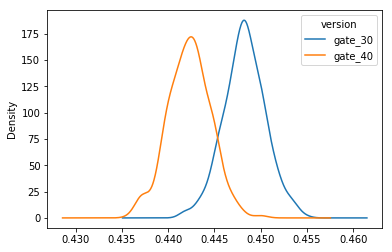

In [17]:
# BS replicates to confirm these patterns hold
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

Text(0.5,0,'% Diff')

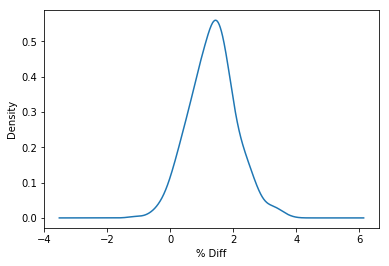

In [18]:
# Finding % difference between groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40) / boot_1d.gate_40 * 100
ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('% Diff')

In [19]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).mean()
prob

0.968

In [20]:
# Calculating 7-day retention for both AB-groups
ret = df.groupby('version')['retention_7'].mean()
ret

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

1.0

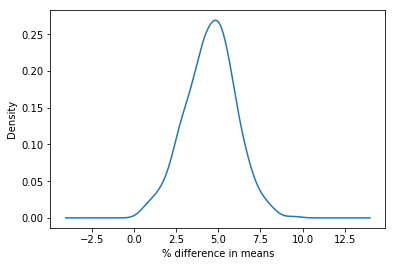

In [21]:
# Checking on 7d retention now
boot_7d = []
for i in range(500):
    boot_mean = df.sample(replace=True, frac=1).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40) / boot_7d.gate_40 * 100
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0 ).mean()

prob